<a href="https://colab.research.google.com/github/SourabhThanvi/Pw_Skills_Sourabh/blob/main/Spotify_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns


In [ ]:
df = pd.read_csv('spotify.csv')

In [ ]:
df.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


In [ ]:
df.describe()

,Popularity,Duration (ms)
count,440.000000,440.000000
mean,75.736364,206810.040909
std,9.886534,53576.930289
min,29.000000,81666.000000
25%,70.000000,172778.500000
50%,77.000000,201866.000000
75%,83.000000,235119.750000
max,97.000000,501648.000000


## 1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful.

In [ ]:
df.isnull().sum()

,0
Artist,0
Track Name,0
Popularity,0
Duration (ms),0
Track ID,0


In [ ]:
df.duplicated().sum()

27

In [ ]:
df.drop_duplicates(inplace=True)

## 2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram

<Axes: xlabel='Popularity', ylabel='Count'>

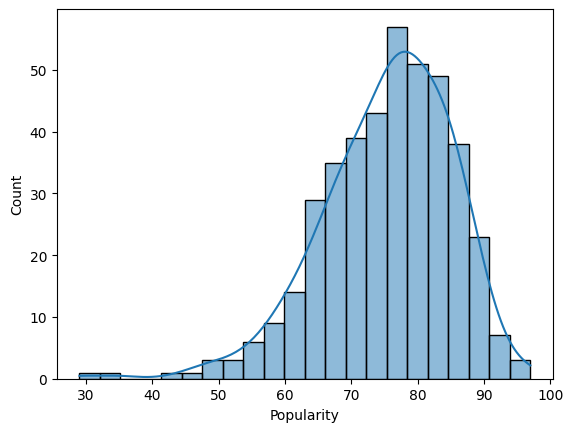

In [ ]:
sns.histplot(df, x=df['Popularity'], kde=True)

## 3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot

<Axes: xlabel='Popularity', ylabel='Duration (ms)'>

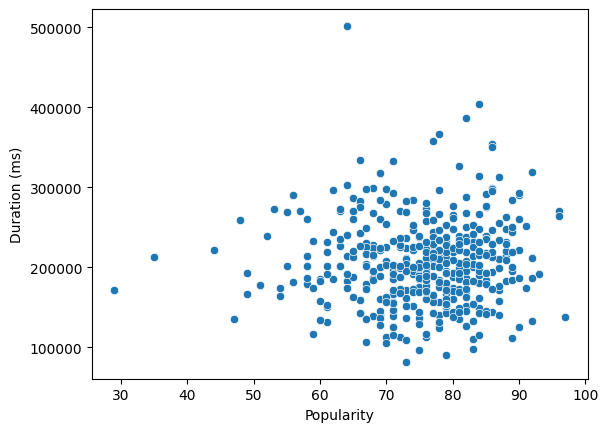

In [ ]:
# Most of the popular music have less duration
sns.scatterplot(x = df['Popularity'], y = df['Duration (ms)'])

## 4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot

In [ ]:
df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

In [ ]:
Artist_max_tracks = df.groupby('Artist')['Track Name'].count().sort_values(ascending=False).head().reset_index()

<Axes: xlabel='Artist', ylabel='Track Name'>

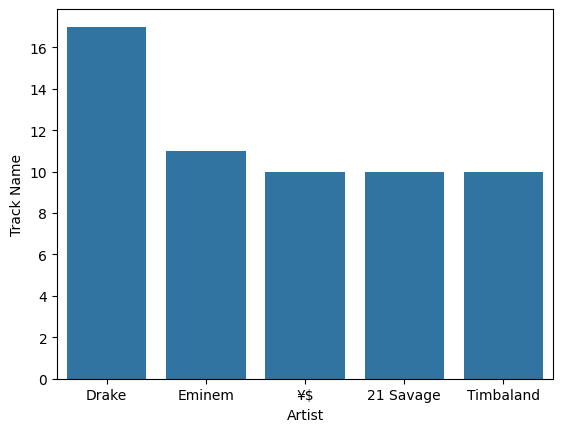

In [ ]:
sns.barplot(y=Artist_max_tracks['Track Name'], x=Artist_max_tracks['Artist'])

## 5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each

In [ ]:
df.sort_values(by='Popularity').head()[['Artist', 'Track Name']]

,Artist,Track Name
207,Pressa,Attachments (feat. Coi Leray)
231,Justin Bieber,Intentions
413,French Montana,Splash Brothers
225,Lil Baby,On Me - Remix
407,Wyclef Jean,911 (feat. Mary J. Blige)


## 6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist

In [ ]:
Top_Artist = df.sort_values(by='Popularity', ascending=False).head()['Artist'].tolist()

In [ ]:
Top_Artist

['Jack Harlow', '21 Savage', '¥$', 'Travis Scott', 'cassö']

In [ ]:
top_artist_df = df[df['Artist'].isin(Top_Artist)]

In [ ]:
top_artist_df.groupby('Artist')['Popularity'].mean().sort_values(ascending=False)

,Popularity
Artist,
cassö,92.000000
Travis Scott,86.555556
¥$,85.100000
21 Savage,83.800000
Jack Harlow,77.714286


## 7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist

In [ ]:
top_artist_df.groupby(['Artist', 'Track Name'])['Popularity'].max().sort_values(ascending=False).head().reset_index()

,Artist,Track Name,Popularity
0,Jack Harlow,Lovin On Me,97
1,21 Savage,redrum,96
2,¥$,CARNIVAL,96
3,Travis Scott,FE!N (feat. Playboi Carti),93
4,cassö,Prada,92


## 8. Visualize relationships between multiple numerical variables simultaneously using a pair plot

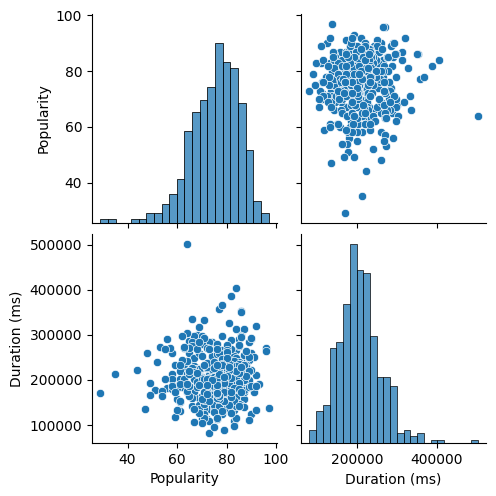

In [ ]:
sns.pairplot(df)

## 9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot

In [ ]:
df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

<Axes: xlabel='Artist', ylabel='Duration (ms)'>

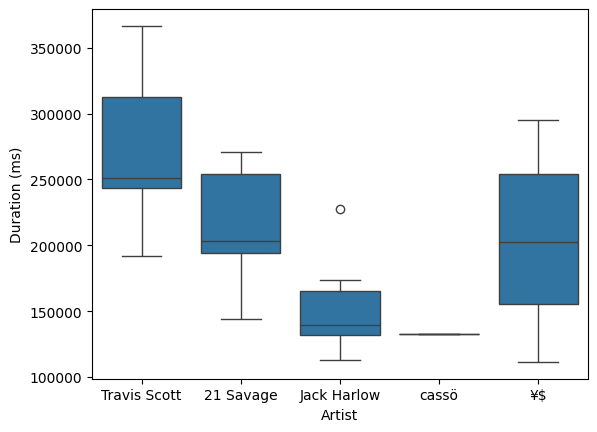

In [ ]:
sns.boxplot(top_artist_df, x=top_artist_df['Artist'], y=top_artist_df['Duration (ms)'])

## 10 How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot

<Axes: xlabel='Artist', ylabel='Popularity'>

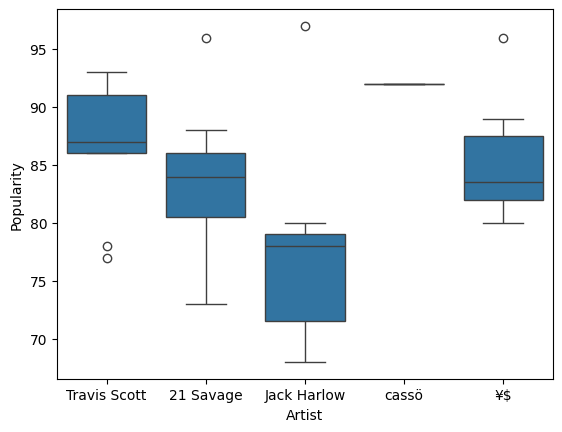

In [ ]:
sns.boxplot(top_artist_df, x=top_artist_df['Artist'], y=top_artist_df['Popularity'])